# Robustness graphs

This notebook provides the graphs for the robustness section

## Packages and options

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fn_results = "../results/results_no_gams.parquet"
map_countries = {
    "FR": "France",
    "DE": "Germany",
    "GR": "Greece",
}

## Get data

In [3]:
df_in = pd.read_parquet(fn_results)

In [4]:
df_agg = (
    df_in
    .groupby(["country", "renewableDemandShare", "yearWeather", "yearDemand"], as_index=False)
    [["MAX_STO", "shareWind"]]
    .mean()
    .assign(
        # convert to percentage and set RE share to zero for non-renewable scenarios
        shareWind=lambda df: (df["renewableDemandShare"] >0).astype(int)*df["shareWind"] * 100,
        renewableDemandShare=lambda df: (df["renewableDemandShare"] * 100).astype(int)
    )
    .round(2)
)

## Graphs

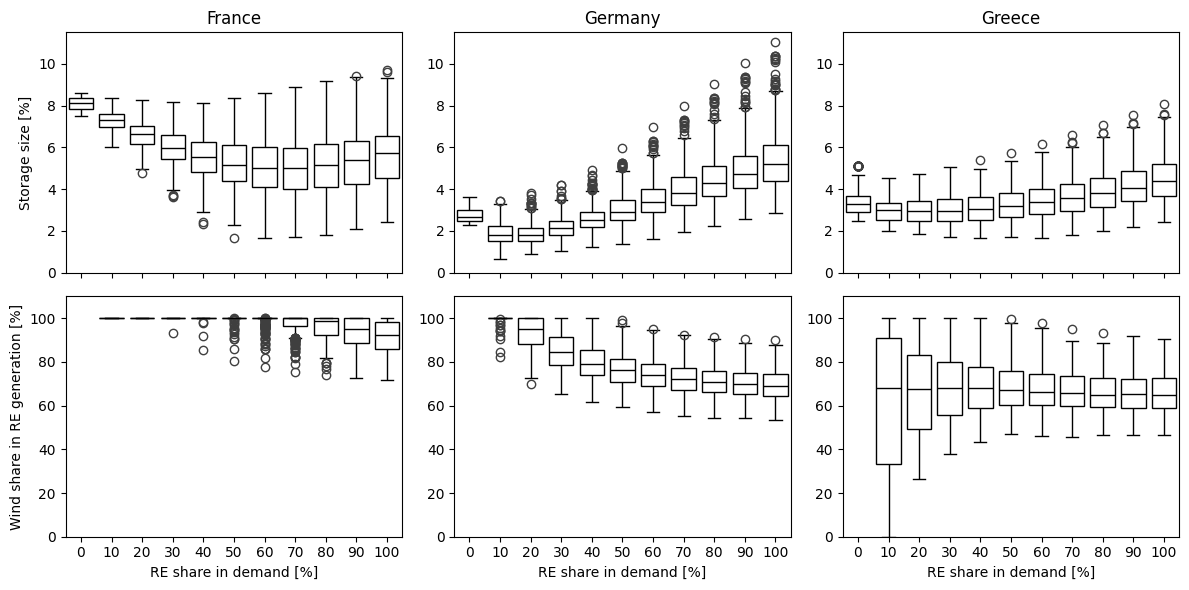

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
df_agg["country"].unique()
for i, country in enumerate(["FR", "DE", "GR"]):
    ax = axs[0, i]
    df_p = df_agg.query(f"country == '{country}'") 
    sns.boxplot(
        df_p, 
        x="renewableDemandShare",
        y="MAX_STO",
        ax=ax,
        **PROPS
    )
    ax.set_ylim(0, 11.5)
    if i == 0:
        ax.set_ylabel("Storage size [%]")
    else:
        ax.set_ylabel("")
    
    ax.set_title(map_countries[country])
    ax = axs[1, i]
    sns.boxplot(
        df_p[df_p["renewableDemandShare"] > 0], 
        x="renewableDemandShare",
        y="shareWind",
        ax=ax,
        **PROPS
    )
    if i == 0:
        ax.set_ylabel("Wind share in RE generation [%]")
    else:
        ax.set_ylabel("")
    ax.set_ylim(0, 110)
    ax.set_xlabel("RE share in demand [%]")
plt.tight_layout()
plt.savefig("../figures/storage_capacity_and_wind_share.png", dpi=300)
    